<a href="https://colab.research.google.com/github/AnvayM/Data-Science/blob/House_Price/House.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_regression
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/Colab Notebooks/House/train.csv"
path2="/content/drive/MyDrive/Colab Notebooks/House/test.csv"
house_train=pd.read_csv(path)
house_test=pd.read_csv(path2)


##**With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home**.

In [ ]:
house_train.head(1460)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

##We will DO Feature selection 

In [ ]:
#Since the data is hudge we need can select only continous data set.
numerical_list=["int16","int32","int64","float16","float32","float64"]

In [ ]:
numerical_col=list(house_train.select_dtypes(numerical_list).columns)

In [ ]:
numerical_col


['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [ ]:
#assigning numerical column to house_train.
house_train=house_train[numerical_col]

house_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [ ]:
house_train=house_train.drop("Id",axis=1)

In [ ]:
X=house_train.drop("SalePrice",axis=1)

In [ ]:
y=house_train["SalePrice"]


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)


In [ ]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
64,60,NaN,9375,7,5,1997,1998,573.0,739,0,318,1057,1057,977,0,2034,1,0,2,1,3,1,8,0,1998.0,2,645,576,36,0,0,0,0,0,2,2009
682,120,NaN,2887,6,5,1996,1997,0.0,1003,0,288,1291,1291,0,0,1291,1,0,1,0,2,1,6,1,1996.0,2,431,307,0,0,0,0,0,0,11,2008
960,20,50.0,7207,5,7,1958,2008,0.0,696,0,162,858,858,0,0,858,1,0,1,0,2,1,4,0,NaN,0,0,117,0,0,0,0,0,0,2,2010
1384,50,60.0,9060,6,5,1939,1950,0.0,204,0,356,560,698,560,0,1258,0,0,1,0,2,1,6,0,1939.0,1,280,0,0,0,0,0,0,0,10,2009
1100,30,60.0,8400,2,5,1920,1950,0.0,290,0,0,290,438,0,0,438,0,0,1,0,1,1,3,0,1930.0,1,246,0,0,0,0,0,0,0,1,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,60,82.0,9430,8,5,1999,1999,673.0,1163,0,89,1252,1268,1097,0,2365,1,0,2,1,3,1,8,1,1999.0,3,856,0,128,0,0,180,0,0,7,2009
835,20,60.0,9600,4,7,1950,1995,0.0,442,0,625,1067,1067,0,0,1067,0,0,2,0,2,1,4,0,1996.0,2,436,290,0,0,0,0,0,0,2,2010
1216,90,68.0,8930,6,5,1978,1978,0.0,0,0,0,0,1318,584,0,1902,0,0,2,0,4,2,8,0,1978.0,2,539,0,0,0,0,0,0,0,4,2010
559,120,NaN,3196,7,5,2003,2004,18.0,0,0,1374,1374,1557,0,0,1557,0,0,2,0,2,1,7,1,2003.0,2,420,143,20,0,0,0,0,0,10,2006


In [ ]:

X_train.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [ ]:
X_train["LotFrontage"].mean()

69.6685440313111

In [ ]:
X_train.fillna({"LotFrontage":69.668},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
X_train.fillna({"MasVnrArea":X_train["MasVnrArea"].mean()},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
X_train.fillna({"GarageYrBlt":X_train["GarageYrBlt"].mean()},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
mutual_info=mutual_info_regression(X_train,y_train)
mutual_info

array([0.24881519, 0.20758447, 0.16686073, 0.52429863, 0.09632554,
       0.35154462, 0.2468342 , 0.09893161, 0.15668416, 0.        ,
       0.11234438, 0.38148838, 0.31319596, 0.22720959, 0.00902256,
       0.48213668, 0.01494602, 0.00404339, 0.25963436, 0.08186981,
       0.04880134, 0.0205857 , 0.18955613, 0.18128529, 0.26114224,
       0.38006912, 0.36816496, 0.06953353, 0.16302568, 0.01163709,
       0.        , 0.01531749, 0.        , 0.01077666, 0.        ,
       0.00566684])

In [ ]:
#Creating a series of mutual info
mutual_info=pd.Series(mutual_info)
mutual_info


0     0.248815
1     0.207584
2     0.166861
3     0.524299
4     0.096326
5     0.351545
6     0.246834
7     0.098932
8     0.156684
9     0.000000
10    0.112344
11    0.381488
12    0.313196
13    0.227210
14    0.009023
15    0.482137
16    0.014946
17    0.004043
18    0.259634
19    0.081870
20    0.048801
21    0.020586
22    0.189556
23    0.181285
24    0.261142
25    0.380069
26    0.368165
27    0.069534
28    0.163026
29    0.011637
30    0.000000
31    0.015317
32    0.000000
33    0.010777
34    0.000000
35    0.005667
dtype: float64

In [ ]:
mutual_info.index=X_train.columns
mutual_info.index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [ ]:
mutual_info.sort_values(ascending=False)


3     0.524299
15    0.482137
11    0.381488
25    0.380069
26    0.368165
5     0.351545
12    0.313196
24    0.261142
18    0.259634
0     0.248815
6     0.246834
13    0.227210
1     0.207584
22    0.189556
23    0.181285
2     0.166861
28    0.163026
8     0.156684
10    0.112344
7     0.098932
4     0.096326
19    0.081870
27    0.069534
20    0.048801
21    0.020586
31    0.015317
16    0.014946
29    0.011637
33    0.010777
14    0.009023
35    0.005667
17    0.004043
9     0.000000
34    0.000000
30    0.000000
32    0.000000
dtype: float64

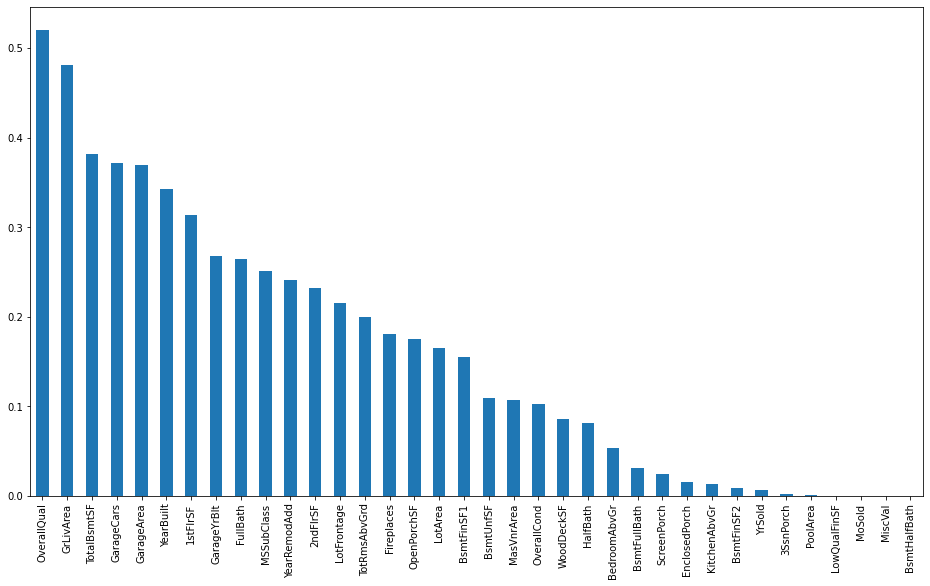

In [ ]:
#plotting the bar which shows the variables having high impact on independent var
mutual_info.sort_values(ascending=False).plot.bar(figsize=(16,9))

In [ ]:
 select_top_columns= SelectPercentile(mutual_info_regression,percentile=20)
 select_top_columns.fit(X_train,y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x7f2ac0dbadd0>)

In [ ]:
p=X_train.columns[select_top_columns.get_support()]
p

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [ ]:
select_top_columns.get_support()

array([False, False, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False])

In [ ]:
select_top_columns.get_support(False)

array([False, False, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False])

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [ ]:
p

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [ ]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
64,60,69.668,9375,7,5,1997,1998,573.0,739,0,318,1057,1057,977,0,2034,1,0,2,1,3,1,8,0,1998.000000,2,645,576,36,0,0,0,0,0,2,2009
682,120,69.668,2887,6,5,1996,1997,0.0,1003,0,288,1291,1291,0,0,1291,1,0,1,0,2,1,6,1,1996.000000,2,431,307,0,0,0,0,0,0,11,2008
960,20,50.000,7207,5,7,1958,2008,0.0,696,0,162,858,858,0,0,858,1,0,1,0,2,1,4,0,1978.012397,0,0,117,0,0,0,0,0,0,2,2010
1384,50,60.000,9060,6,5,1939,1950,0.0,204,0,356,560,698,560,0,1258,0,0,1,0,2,1,6,0,1939.000000,1,280,0,0,0,0,0,0,0,10,2009
1100,30,60.000,8400,2,5,1920,1950,0.0,290,0,0,290,438,0,0,438,0,0,1,0,1,1,3,0,1930.000000,1,246,0,0,0,0,0,0,0,1,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,60,82.000,9430,8,5,1999,1999,673.0,1163,0,89,1252,1268,1097,0,2365,1,0,2,1,3,1,8,1,1999.000000,3,856,0,128,0,0,180,0,0,7,2009
835,20,60.000,9600,4,7,1950,1995,0.0,442,0,625,1067,1067,0,0,1067,0,0,2,0,2,1,4,0,1996.000000,2,436,290,0,0,0,0,0,0,2,2010
1216,90,68.000,8930,6,5,1978,1978,0.0,0,0,0,0,1318,584,0,1902,0,0,2,0,4,2,8,0,1978.000000,2,539,0,0,0,0,0,0,0,4,2010
559,120,69.668,3196,7,5,2003,2004,18.0,0,0,1374,1374,1557,0,0,1557,0,0,2,0,2,1,7,1,2003.000000,2,420,143,20,0,0,0,0,0,10,2006


In [ ]:
sc=StandardScaler()

In [ ]:
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(X_train_sc,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.coef_

array([-5.52887840e+03,  2.56000940e+03,  4.49756664e+03,  2.13105125e+04,
        5.04498715e+03,  7.46463820e+03,  3.46453625e+03,  6.23739780e+03,
       -5.51494374e+15, -2.02617669e+15, -5.55489761e+15,  5.26236168e+15,
       -5.52867434e+16, -6.51695303e+16, -7.06572895e+15,  7.65484352e+16,
        2.09092403e+03,  5.50156671e+02,  2.07670496e+03, -5.13747881e+02,
       -8.43374510e+03, -2.98332404e+03,  7.75819831e+03,  2.87914711e+03,
        2.33759807e+03,  1.31200639e+03,  4.64334708e+03,  2.57219507e+03,
        9.13294188e+00,  9.74861492e+01,  4.61270180e+02,  1.57002215e+03,
        7.99794538e+02, -3.41481600e+02, -1.03718106e+03, -7.80071626e+02])

In [ ]:
X_test_sc[0,:]

array([-0.05839596, -0.46117929,  2.38920418,  3.62029584,  1.91836248,
        0.32139819,  0.06996248])

In [ ]:
lr.predict([X_test_sc[0,:]])

array([273121.14020712])

In [ ]:
X_test_sc

array([[-0.05839596, -0.46117929,  2.38920418, ...,  1.91836248,
         0.32139819,  0.06996248],
       [-0.05839596, -0.990498  , -0.60810332, ...,  0.10793406,
        -1.04154351, -1.09913238],
       [-0.79519441, -0.69275623, -0.84466868, ..., -0.61662374,
        -1.04154351, -0.56249868],
       ...,
       [ 1.41520093,  0.79595266,  2.56967673, ...,  1.14163652,
         1.6843399 ,  1.77089966],
       [ 0.67840248,  1.0275296 ,  1.2624702 , ...,  0.09827329,
         0.32139819,  0.35744482],
       [ 2.15199937,  1.25910653,  3.10865554, ...,  1.62660721,
         1.6843399 ,  1.67986359]])

In [ ]:
lr.predict(X_test_sc)

array([273121.14020712, 150985.28858687, 117971.64568806, 231549.02955425,
       122590.96940558, 101464.30605526, 255814.03534231, 151078.82791999,
       492278.22297573, 164680.71153447, 210939.6961827 , 198017.30966939,
       228756.56568767, 107792.6715415 , 136212.26920215, 145159.83005277,
       220723.23363241,  92898.97483309, 138798.40040246, 173387.54528618,
       152265.94928915, 141562.33813936, 111268.33275623, 162551.83003806,
       195681.87652349, 190207.19258558, 176625.71379791,  50945.62091123,
       296725.82024118, 118942.93395101, 213726.00409125, 205283.96960945,
       140919.33285549, 283375.92546301, 314659.59320372, 184211.35195483,
       272211.09540947, 117731.54799911, 239222.96756731, 311174.74678784,
       227323.61780928, 133837.40194701, 203358.99634943, 294833.99989201,
       325833.7345953 , 189569.14864105, 119630.3059854 , 112224.68118396,
       181873.91185871,  59398.95357503, 340356.45109175, 136237.17458489,
       189733.81129021,  

In [ ]:
lr.score(X_test_sc,y_test)

0.6983163671286745